In [59]:
import matplotlib.pyplot as plt
from numpy import linspace, pi, sqrt, log, ceil
from scipy.optimize import curve_fit
from scipy.stats import poisson, norm, gamma
from csv import reader, QUOTE_NONNUMERIC

def percenticize(ys):
    return list(map(lambda y: y / sum(ys), ys))

def read_csv(path):
    xs = []
    ys = []
    with open(path) as file:
        for row in reader(file, quoting=QUOTE_NONNUMERIC):
            xs.append(row[0])
            ys.append(row[1])
    return xs, ys

[]

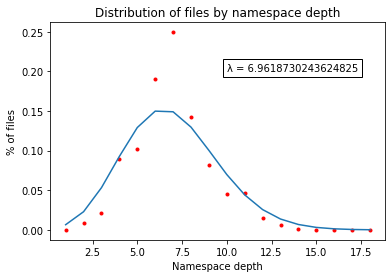

In [35]:
# Fileswithdepth

depth, files = read_csv("file-depths.csv")
mu = sum(map(lambda d, f: d * f, depth, files))

plt.figure()
plt.plot(depth, files, "r.")
plt.plot(depth, poisson.pmf(depth, mu))
plt.text(10, 0.2, "λ = {0}".format(mu), bbox=dict(facecolor='white'))
plt.xlabel("Namespace depth")
plt.ylabel("% of files")
plt.title("Distribution of files by namespace depth")
plt.plot()

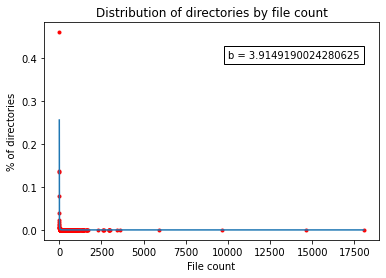

In [24]:
# Dircountfiles

def inv_quad(x, b):
    return b / ((x + b) ** 2)

files, dirs = read_csv("file-counts.csv")
b = curve_fit(inv_quad, files, dirs, [2.36])[0][0]
xs = linspace(files[0], files[-1], round(files[-1]) * 2)
ys = list(map(lambda x: inv_quad(x, b), xs))

plt.figure()
plt.plot(files, dirs, "r.")
plt.plot(xs, ys)
plt.text(10000, 0.4, "b = {0}".format(b), bbox=dict(facecolor='white'))
plt.xlabel("File count")
plt.ylabel("% of directories")
plt.title("Distribution of directories by file count")
plt.show()

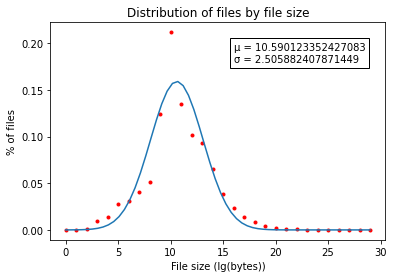

In [28]:
# FilecountDistr

sizes, files = read_csv("file-sizes.csv")
mu, sigma = curve_fit(norm.pdf, sizes, files, [10, 2])[0]
xs = linspace(sizes[0], sizes[-1], round(sizes[-1]) * 2)
ys = list(map(lambda x: norm.pdf(x, mu, sigma), xs))

plt.figure()
plt.plot(sizes, files, "r.")
plt.plot(xs, ys)
plt.text(16, 0.18, "μ = {0}\nσ = {1}".format(mu, sigma), bbox=dict(facecolor='white'))
plt.xlabel("File size (lg(bytes))")
plt.ylabel("% of files")
plt.title("Distribution of files by file size")
plt.show()

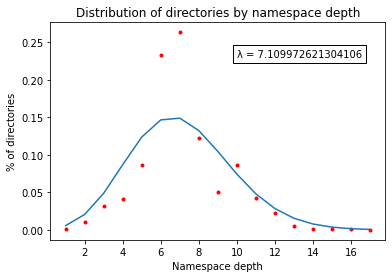

In [37]:
# Dirswithdepth

depth, dirs = read_csv("dir-depths.csv")
mu = sum(map(lambda d, f: d * f, depth, dirs))

plt.figure()
plt.plot(depth, dirs, "r.")
plt.plot(depth, poisson.pmf(depth, mu))
plt.text(10, 0.23, "λ = {0}".format(mu), bbox=dict(facecolor='white'))
plt.xlabel("Namespace depth")
plt.ylabel("% of directories")
plt.title("Distribution of directories by namespace depth")
plt.show()

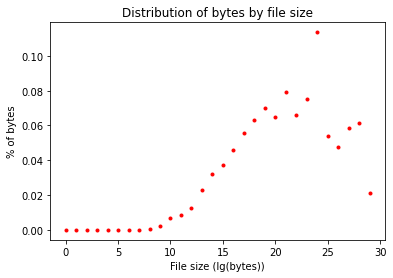

In [71]:
# BytesizeDistr

sizes, byte = read_csv("file-bytes.csv")
plt.figure()
plt.plot(sizes, byte, "r.")
plt.xlabel("File size (lg(bytes))")
plt.ylabel("% of bytes")
plt.title("Distribution of bytes by file size")
plt.show()